## Observations and Insights 

 Student Observations:
1.	Capomulin and Ramicane had the highest tumor volume of the 10 treatments (230 mm3 and 228 mm3, respectively).  The standard deviation for these same two treatments were the lowest, 4.9% and 4.8%, respectively. 

2.	While Capomulin and Ramicane appear to be similar and the highest effective drug regimen according to the bar and box plots.  While viewing the box plot, Capomulin may be slightly less predictable because the width of the box is wider than Ramicane’s box.  

3.	According to Wikipedia, In humans, the natural ratio between males and females at birth is slightly biased towards the male sex, being estimated to be about 1.05[2] or 1.06[3].  (https://en.wikipedia.org/wiki/Human_sex_ratio#:~:text=Like%20most%20sexual%20species%2C%20the,1.06%20males%2Fper%20female%20born.)   This is very similar to the sex ratio in mice in this study:  50.2% males and 49.8% females.


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [13]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [14]:
# display csv file for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
# display csv file for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df = pd.DataFrame(combined_mouse_study_df)

# Displa# display csv file for previewy the merged data table for preview
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [18]:
# Checking the number of mice.
mice_num = combined_df["Mouse ID"].value_counts()
mice_num

g989    13
v923    10
c402    10
m269    10
w151    10
        ..
f932     1
o848     1
u153     1
l872     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [19]:
mice_num = len(mice_num)
print(mice_num)

249


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
    # https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
        # df = df[df.duplicated(subset=['val1','val2'], keep=False)]
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_id = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print(dup_mouse_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [21]:
# check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
    # dframe = dframe[dframe["A"] != 'a']
dropped_dup_mice_df = combined_df[combined_df["Mouse ID"] != 'g989']


dropped_dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = dropped_dup_mice_df["Mouse ID"].value_counts()
print(cleaned_mice_num)

v923    10
c402    10
m269    10
w151    10
q633    10
        ..
f932     1
o848     1
u153     1
l872     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64


In [23]:
cleaned_mice_num = len(cleaned_mice_num)
print(cleaned_mice_num)

248


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_regimen = dropped_dup_mice_df.groupby(["Drug Regimen"])

group_regimen
group_regimen.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [25]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

g_regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()
g_regimen_mean
g_regimen_median = group_regimen["Tumor Volume (mm3)"].median()
g_regimen_var = group_regimen["Tumor Volume (mm3)"].var()
g_regimen_std = group_regimen["Tumor Volume (mm3)"].std()
g_regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()

In [26]:
# Assemble the resulting series into a single summary dataframe.
# Create a summary statistics table of mean, med, var, std, and SEM of the tumor volume for each regimen

# stats_summary = pd.DataFrame({"Mean": ["g_regimen_mean"], 
#                                         "Median": ["g_regimen_median"],
#                                         "Variance": ["g_regimen_var"],           
#                                         "Standard Deviation": ["g_regimen_std"],
#                                         "SEM": ["g_regimen_sem"]})


stats_summary = pd.DataFrame({"Mean": g_regimen_mean,
                                        "Median": g_regimen_median,
                                        "Variance": g_regimen_var,           
                                        "Standard Deviation": g_regimen_std,
                                        "SEM": g_regimen_sem})
stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary stats table of mean, median, variance, std deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_group = dropped_dup_mice_df.groupby('Drug Regimen')
stats_summary_agg = agg_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stats_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [28]:
# PANDAS bar plot showing the total number of measurements taken on each drug regimen.
# Create a group based on the values in the regimen column
group_bar_pandas = combined_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
print(group_bar_pandas)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64


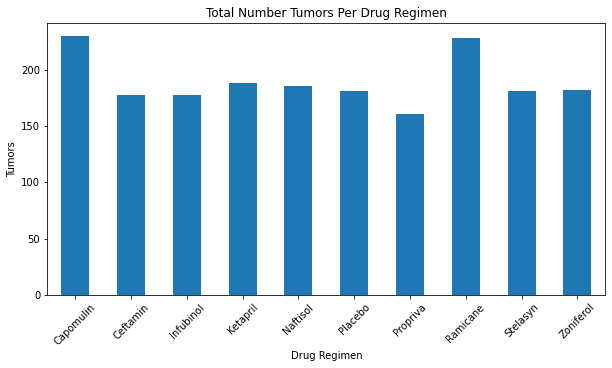

<Figure size 432x288 with 0 Axes>

In [29]:
# Use DataFrame.plot() in order to create a bar chart of the data
group_bar_pandas.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Total Number Tumors Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumors")
plt.xticks(rotation = 45)

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Tumors')

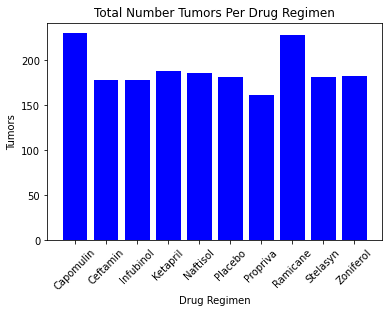

In [30]:
# PYPLOT bar plot showing the total number of measurements taken on each drug regimen.

plt.bar(group_bar_pandas.index, group_bar_pandas, color="b", align="center")
plt.xticks(rotation = 45)

# Set the x and y limits
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(dropped_dup_mice_df["Tumor Volume (mm3)"])+10)

# # Set a title and labels
plt.title("Total Number Tumors Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumors")

In [31]:
# save and show graph
plt.tight_layout()
#plt.savefig()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [32]:
# PANDAS pie plot showing the distribution of female versus male mice
# create DF with total male and female mice; group by gender
group_pie_gender = mouse_metadata.groupby('Sex').count()
#group_pie_gender

In [33]:
gender_num = [group_pie_gender["Mouse ID"]]
#gender_num

<ipython-input-34-951269415dfa>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_num, labels=gender_label, colors=colors,labeldistance = None,


(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

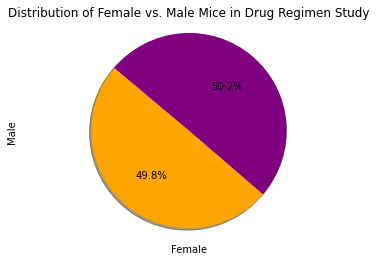

In [34]:
# misc labels
colors = ["orange", "purple"]
gender_label = ["Female", "Male"]
plt.title('Distribution of Female vs. Male Mice in Drug Regimen Study')
gender_label = list(group_pie_gender.index)
plt.xlabel('Female')
plt.ylabel('Male')

plt.pie(gender_num, labels=gender_label, colors=colors,labeldistance = None,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


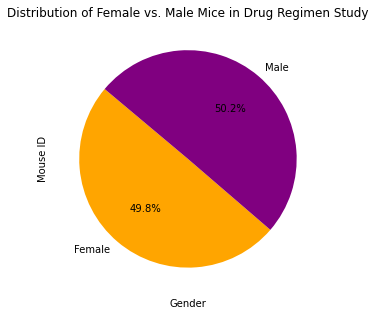

<Figure size 432x288 with 0 Axes>

In [35]:
# PYPLOT pie plot showing the distribution of female versus male mice
# Set a title, labels, colors, etc

# labels, etc gender_label = ["Female", "Male"]
plt.title("Distribution of Female vs. Male Mice in Drug Regimen Study")
plt.xlabel("Gender")
plt.ylabel("Percent Gender")
colors = ["orange", "purple"]
#gender_label = ["Female", "Male"]

group_pie_gender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=140, colors=colors)
# generage pie chart
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate final tumor volume of each mouse across these treatment regimens: Capomulin, Ramicane, Infubinol, Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
groupby_mouseid_df = dropped_dup_mice_df.groupby(['Mouse ID'])
max_timepoint_df = groupby_mouseid_df['Timepoint'].max().to_frame()
max_timepoint_df.reset_index(inplace = True)
max_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [70]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_tumor_vol_df = pd.merge(dropped_dup_mice_df, max_timepoint_df)
max_timepoint_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [71]:
# put treatments into a list for the loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [72]:
# create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [73]:
# calculate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = max_timepoint_tumor_vol_df.loc[max_timepoint_tumor_vol_df['Drug Regimen'] == treatment,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_vols)

In [74]:
# Determine outliers using upper and lower bounds
quartiles = tumor_vols.quantile([.25,.5,.75])
first_quartile = quartiles[0.25]
third_quartile = quartiles[0.75]
iqr = third_quartile - first_quartile
low_threshold = first_quartile - 1.5*iqr
high_threshold = third_quartile + 1.5*iqr
outliers = tumor_vols.loc[(tumor_vols < low_threshold) | (tumor_vols > high_threshold)]
print(treatment, outliers)

Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


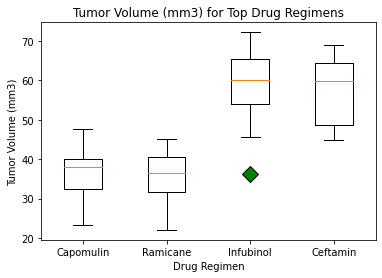

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title("Tumor Volume (mm3) for Top Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
green_diamond = dict(markerfacecolor='g', marker='D', markersize = 12)
plt.boxplot(tumor_vol_list, labels = treatments, flierprops = green_diamond)
plt.show()

## Line and Scatter Plots

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# identify mice treated with Capomulin
capomulin = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin"]
#capomulin.head(25)  #confirm this is all capomulin rows

In [79]:
# identify a mouse
mouse_line_df = capomulin.loc[capomulin["Mouse ID"] == "s185",:]
#mouse_line_df.head(25)  confirm there are only 10 rows in this dataframe

In [44]:
# identify axes
x_axis = mouse_line_df["Timepoint"]
y_axis = mouse_line_df["Tumor Volume (mm3)"]

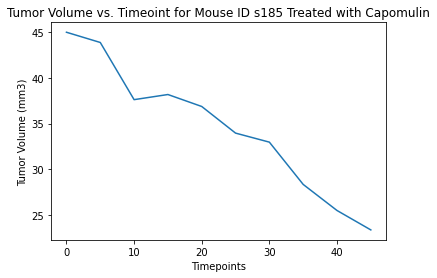

In [45]:
# titles, labels, etc
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timeoint for Mouse ID s185 Treated with Capomulin")

# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)
plt.show()

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin",:]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [47]:
#Average Tumor volume for EVERY MouseID
ave_tumor_vol = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_wt = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()

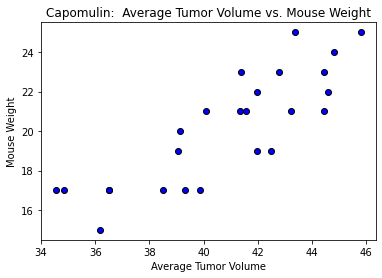

In [48]:
# visualization of the scatter plot

plt.scatter(ave_tumor_vol, mouse_wt, facecolors="blue", edgecolors="black", marker="o")
plt.title('Capomulin:  Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
# plt.xlim(32,48)
# plt.ylim(14, 26)

plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [50]:
# copy of dataframe
capomulin = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin",:]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [51]:
capomulin.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1
226,r157,Capomulin,Male,22,25,0,45.000000,0
227,r157,Capomulin,Male,22,25,5,45.597064,0
228,r157,Capomulin,Male,22,25,10,46.059608,0


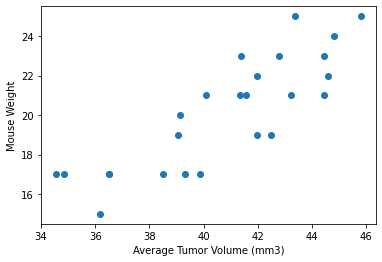

In [52]:
# capomulin = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin",:]
# Add the linear regression equation and line to plot
x_values = ave_tumor_vol
y_values = mouse_wt
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight')
plt.show()

The r-squared is: 0.7088568047708717


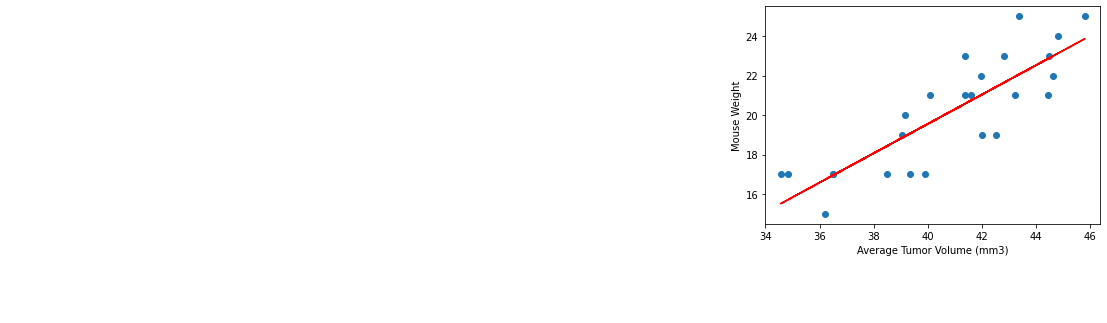

In [53]:
# Add the linear regression equation and line to plot
x_values = ave_tumor_vol
y_values = mouse_wt
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()